In [1]:
## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## Importing Datasets

In [4]:
df_train=pd.read_csv('train_LZdllcl.csv')
df_test=pd.read_csv('test_2umaH9m.csv')

In [5]:
## Visual glance at the dataset

In [6]:
df_train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [7]:
df_test.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [8]:
## Basic information about the dataset

In [9]:
df_train.shape

(54808, 14)

In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
df_train['education'].fillna(df_train['education'].mode(),inplace=True)

In [13]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
## Basic EDA

In [15]:
df_train.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [16]:
df_train.region.nunique()

34

In [17]:
df_train.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [18]:
df_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [19]:
df_train.groupby(by='department')['employee_id'].count()

department
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
Operations           11348
Procurement           7138
R&D                    999
Sales & Marketing    16840
Technology            7138
Name: employee_id, dtype: int64

In [20]:
df_train.groupby(by='region')['employee_id'].count()

region
region_1       610
region_10      648
region_11     1315
region_12      500
region_13     2648
region_14      827
region_15     2808
region_16     1465
region_17      796
region_18       31
region_19      874
region_2     12343
region_20      850
region_21      411
region_22     6428
region_23     1175
region_24      508
region_25      819
region_26     2260
region_27     1659
region_28     1318
region_29      994
region_3       346
region_30      657
region_31     1935
region_32      945
region_33      269
region_34      292
region_4      1703
region_5       766
region_6       690
region_7      4843
region_8       655
region_9       420
Name: employee_id, dtype: int64

In [21]:
df_train.groupby(by='education')['employee_id'].count()

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: employee_id, dtype: int64

In [22]:
df_train.groupby(by='gender')['employee_id'].count()

gender
f    16312
m    38496
Name: employee_id, dtype: int64

In [23]:
df_train.groupby(by='recruitment_channel')['employee_id'].count()

recruitment_channel
other       30446
referred     1142
sourcing    23220
Name: employee_id, dtype: int64

In [24]:
df_train.groupby(by='KPIs_met >80%')['employee_id'].count()

KPIs_met >80%
0    35517
1    19291
Name: employee_id, dtype: int64

In [25]:
df_train['previous_year_rating'].nunique()

5

In [26]:
df_train.groupby(by='previous_year_rating')['employee_id'].count()

previous_year_rating
1.0     6223
2.0     4225
3.0    18618
4.0     9877
5.0    11741
Name: employee_id, dtype: int64

In [27]:
df_train.groupby(by='awards_won?')['employee_id'].count()

awards_won?
0    53538
1     1270
Name: employee_id, dtype: int64

In [28]:
## Let's check how many people got promoted this year.

In [29]:
df_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [30]:
## Let's check how these parameters impact the promotion of an employee.

In [31]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [32]:
df_train.groupby('department')['is_promoted'].value_counts()

department         is_promoted
Analytics          0               4840
                   1                512
Finance            0               2330
                   1                206
HR                 0               2282
                   1                136
Legal              0                986
                   1                 53
Operations         0              10325
                   1               1023
Procurement        0               6450
                   1                688
R&D                0                930
                   1                 69
Sales & Marketing  0              15627
                   1               1213
Technology         0               6370
                   1                768
Name: is_promoted, dtype: int64

In [33]:
df_train.groupby(by='region')['is_promoted'].value_counts()

region     is_promoted
region_1   0               552
           1                58
region_10  0               597
           1                51
region_11  0              1241
                          ... 
region_7   1               516
region_8   0               602
           1                53
region_9   0               412
           1                 8
Name: is_promoted, Length: 68, dtype: int64

In [34]:
df_train.groupby(by='education')['is_promoted'].value_counts()

education         is_promoted
Bachelor's        0              33661
                  1               3008
Below Secondary   0                738
                  1                 67
Master's & above  0              13454
                  1               1471
Name: is_promoted, dtype: int64

In [35]:
df_train.groupby(by='gender')['is_promoted'].value_counts()

gender  is_promoted
f       0              14845
        1               1467
m       0              35295
        1               3201
Name: is_promoted, dtype: int64

In [36]:
df_train.groupby(by='recruitment_channel')['is_promoted'].value_counts()

recruitment_channel  is_promoted
other                0              27890
                     1               2556
referred             0               1004
                     1                138
sourcing             0              21246
                     1               1974
Name: is_promoted, dtype: int64

In [37]:
df_train.groupby(by='no_of_trainings')['is_promoted'].value_counts()

no_of_trainings  is_promoted
1                0              40468
                 1               3910
2                0               7382
                 1                605
3                0               1654
                 1                122
4                0                442
                 1                 26
5                0                125
                 1                  3
6                0                 42
                 1                  2
7                0                 12
8                0                  5
9                0                  5
10               0                  5
Name: is_promoted, dtype: int64

In [38]:
df_train.groupby(by='previous_year_rating')['is_promoted'].value_counts()

previous_year_rating  is_promoted
1.0                   0               6135
                      1                 88
2.0                   0               4044
                      1                181
3.0                   0              17263
                      1               1355
4.0                   0               9093
                      1                784
5.0                   0               9820
                      1               1921
Name: is_promoted, dtype: int64

In [39]:
df_train.groupby(by='KPIs_met >80%')['is_promoted'].value_counts()

KPIs_met >80%  is_promoted
0              0              34111
               1               1406
1              0              16029
               1               3262
Name: is_promoted, dtype: int64

In [40]:
df_train.groupby(by='awards_won?')['is_promoted'].value_counts()

awards_won?  is_promoted
0            0              49429
             1               4109
1            0                711
             1                559
Name: is_promoted, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

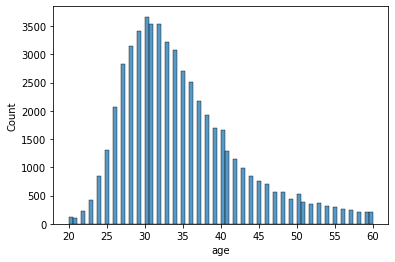

In [41]:
sns.histplot(df_train['age'])

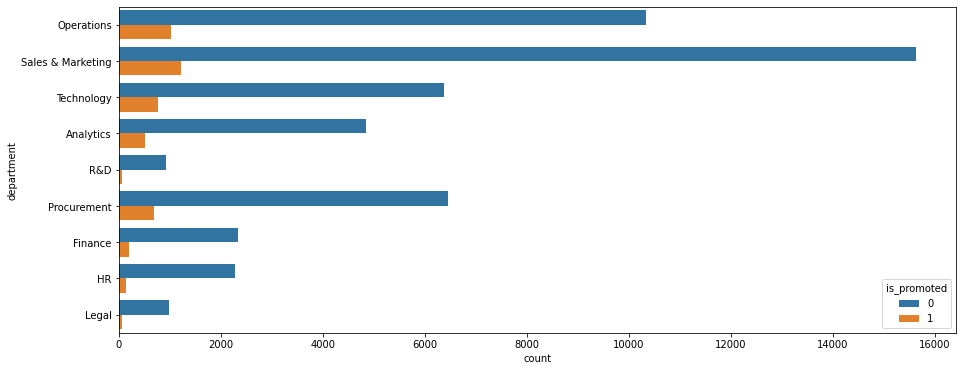

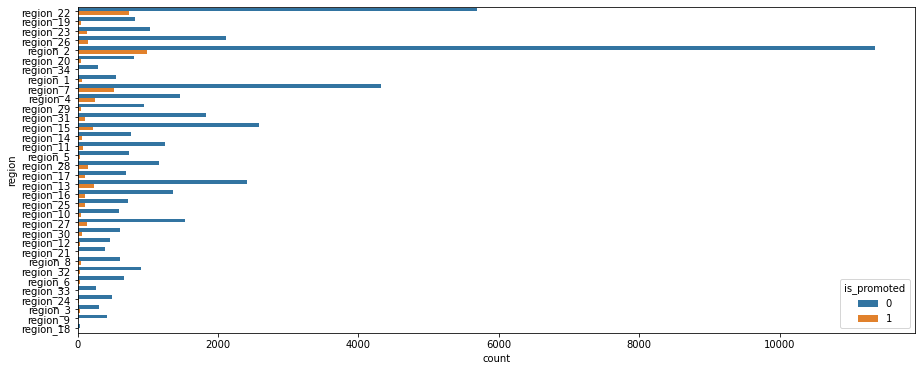

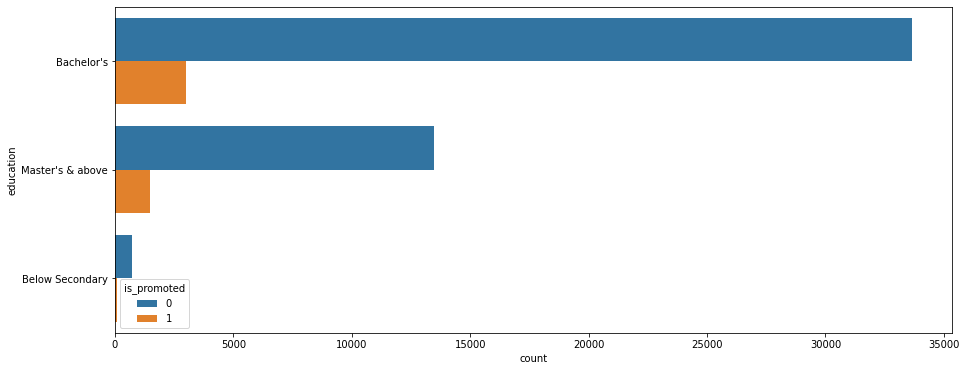

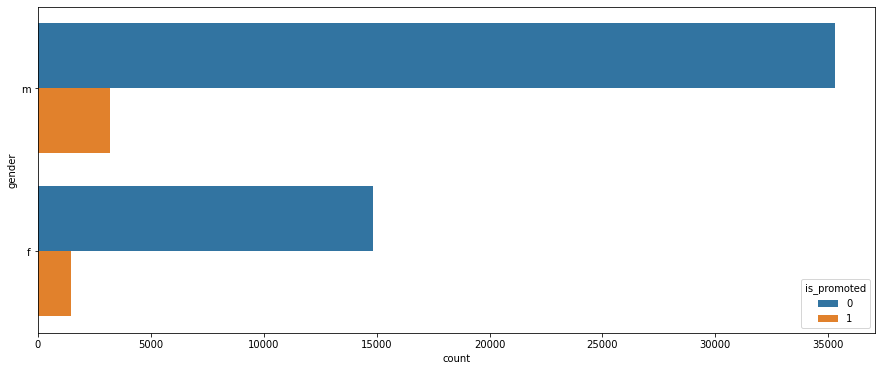

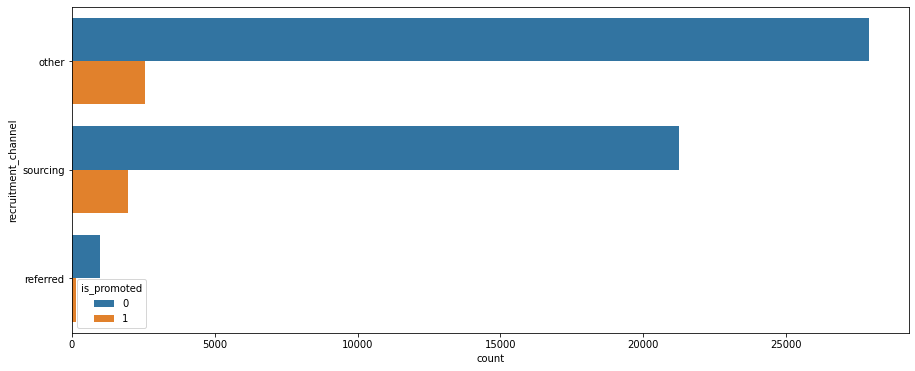

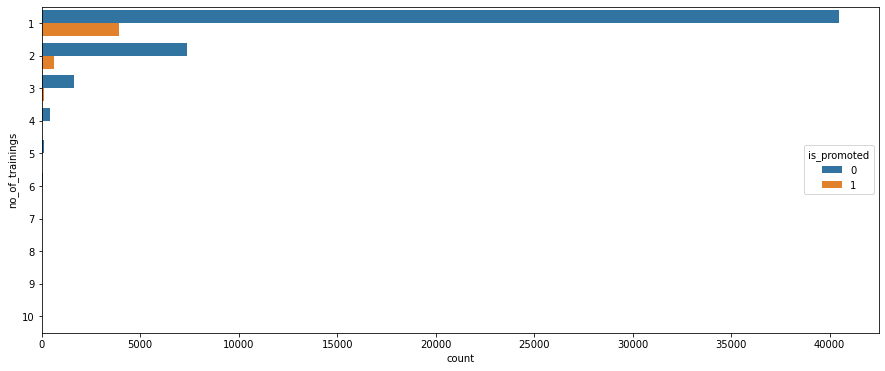

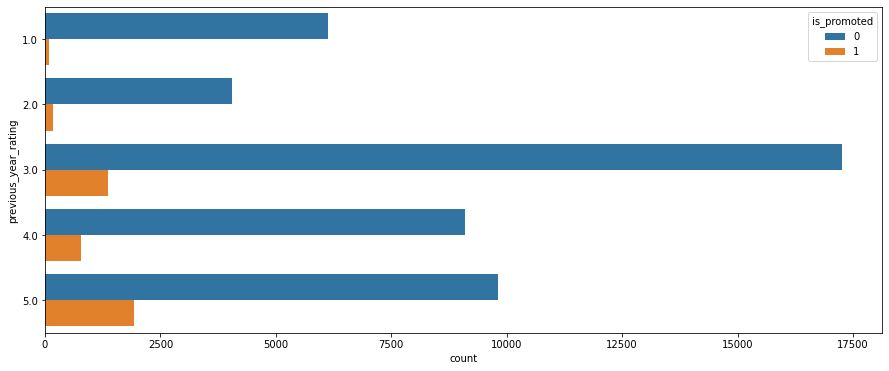

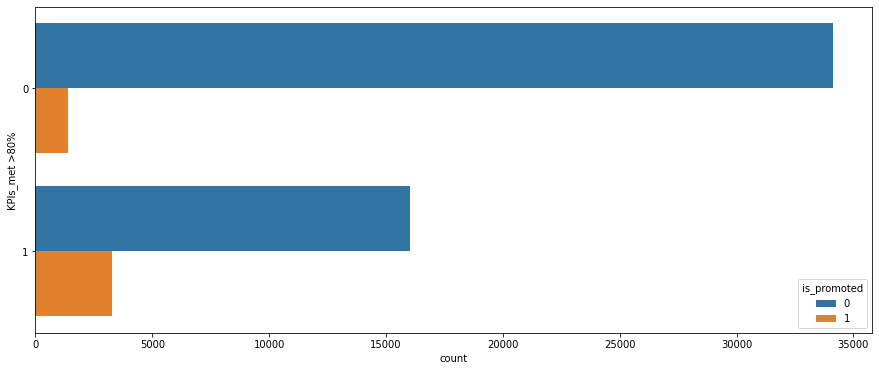

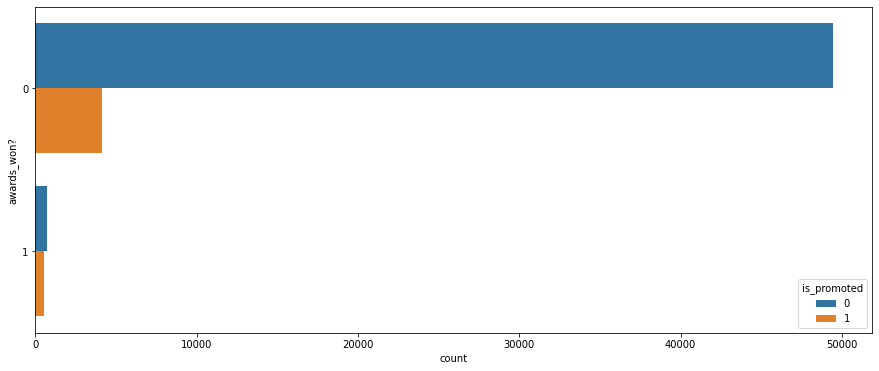

In [42]:
cat=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?']
for i in cat:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.countplot(y = df_train[i][1:],data=df_train,hue=df_train['is_promoted'])

In [43]:
## Now that we have basic ideas about the dataset, we need to preprocess the data in order to make predictions.

In [44]:
## Let's change the datatype first as per our need.
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()
df_train['education']=le.fit_transform(df_train['education'])
df_train['education'].fillna(df_train['education'].mode(),inplace=True)
df_train['previous_year_rating']=le.fit_transform(df_train['previous_year_rating'])
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mode(),inplace=True)

In [47]:
df_train_encoded=pd.get_dummies(data=df_train,columns=['department','education','gender','recruitment_channel','KPIs_met >80%','awards_won?','region','no_of_trainings'])

In [48]:
df_train_encoded.isnull().sum()

employee_id             0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
                       ..
no_of_trainings_6       0
no_of_trainings_7       0
no_of_trainings_8       0
no_of_trainings_9       0
no_of_trainings_10      0
Length: 72, dtype: int64

In [49]:
df_train_encoded.drop('employee_id',axis=1,inplace=True)

In [50]:
df_train_encoded.head()

,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,no_of_trainings_1,no_of_trainings_2,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5,no_of_trainings_6,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10
0,35,4,8,49,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,30,4,4,60,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,34,2,7,50,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,39,0,10,50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,45,2,2,73,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
X=df_train_encoded.drop(columns='is_promoted')
y=df_train_encoded['is_promoted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (43846, 70)
Shape of X_test (10962, 70)
Shape of y_train (43846,)
Shape of y_test (10962,)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
LR=LogisticRegression(max_iter=2000)
LR.fit(X_train,y_train)
y1_pred=LR.predict(X_test)
print(metrics.classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10015
           1       0.83      0.27      0.41       947

    accuracy                           0.93     10962
   macro avg       0.88      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



/home/peru/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
metrics.confusion_matrix(y_test,y1_pred)

array([[9962,   53],
       [ 692,  255]])

In [56]:
from sklearn.tree import DecisionTreeClassifier
DTc=DecisionTreeClassifier(splitter='best')
DTc.fit(X_train,y_train)
y2_pred=DTc.predict(X_test)

In [57]:
print(metrics.classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10015
           1       0.43      0.46      0.45       947

    accuracy                           0.90     10962
   macro avg       0.69      0.70      0.70     10962
weighted avg       0.90      0.90      0.90     10962



In [58]:
metrics.confusion_matrix(y_test,y2_pred)

array([[9435,  580],
       [ 508,  439]])

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFc=RandomForestClassifier()
RFc.fit(X_train,y_train)
y3_pred=RFc.predict(X_test)

In [60]:
df_check3=pd.DataFrame({'Actual':y_test, 'Predicted by RF':y3_pred})
df_check3.head(10)
print(metrics.classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10015
           1       0.78      0.28      0.41       947

    accuracy                           0.93     10962
   macro avg       0.86      0.64      0.69     10962
weighted avg       0.92      0.93      0.92     10962



In [61]:
metrics.confusion_matrix(y_test,y3_pred)

array([[9942,   73],
       [ 683,  264]])

## Recall value is really less, in both the the models.
## This can be because of the fact that target variable is highly imbalanced. Let's try and balance the data first. 

In [62]:
X.shape

(54808, 70)

In [63]:
from imblearn.over_sampling import RandomOverSampler
ROS=RandomOverSampler(sampling_strategy='minority')
X_balanced,y_balanced=ROS.fit_resample(X,y)

In [64]:
X_balanced.shape,y_balanced.shape

((100280, 70), (100280,))

In [65]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_balanced,y_balanced, test_size=0.2, random_state=1)

In [66]:
print('Shape of X1_train',X1_train.shape)
print('Shape of X1_test',X1_test.shape)
print('Shape of y1_train',y1_train.shape)
print('Shape of y1_test',y1_test.shape)

Shape of X1_train (80224, 70)
Shape of X1_test (20056, 70)
Shape of y1_train (80224,)
Shape of y1_test (20056,)


In [67]:
LR4=LogisticRegression(max_iter=3000)
LR4.fit(X1_train,y1_train)
y4_pred=LR4.predict(X1_test)
print(metrics.classification_report(y1_test,y4_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     10103
           1       0.78      0.82      0.80      9953

    accuracy                           0.79     20056
   macro avg       0.79      0.79      0.79     20056
weighted avg       0.79      0.79      0.79     20056



In [68]:
DTc5=DecisionTreeClassifier(splitter='best')
DTc5.fit(X1_train,y1_train)
y5_pred=DTc.predict(X1_test)
print(metrics.classification_report(y1_test,y5_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10103
           1       0.99      0.89      0.94      9953

    accuracy                           0.94     20056
   macro avg       0.95      0.94      0.94     20056
weighted avg       0.95      0.94      0.94     20056



In [69]:
RFc6=RandomForestClassifier()
RFc6.fit(X1_train,y1_train)
y6_pred=RFc.predict(X1_test)
print(metrics.classification_report(y1_test,y6_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     10103
           1       1.00      0.86      0.92      9953

    accuracy                           0.93     20056
   macro avg       0.94      0.93      0.93     20056
weighted avg       0.94      0.93      0.93     20056



In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X1_train,y1_train)
y7_pred=knn.predict(X1_test)
print(metrics.classification_report(y1_test,y7_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     10103
           1       0.84      1.00      0.91      9953

    accuracy                           0.91     20056
   macro avg       0.92      0.91      0.91     20056
weighted avg       0.92      0.91      0.91     20056



In [71]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X1_train,y1_train)
y8_pred=abc.predict(X1_test)
print(metrics.classification_report(y1_test,y8_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10103
           1       0.76      0.77      0.76      9953

    accuracy                           0.77     20056
   macro avg       0.77      0.77      0.77     20056
weighted avg       0.77      0.77      0.77     20056



In [72]:
from xgboost import XGBClassifier
XGBc=XGBClassifier()
XGBc.fit(X1_train,y1_train)
y9_pred=XGBc.predict(X1_test)
print(metrics.classification_report(y1_test,y9_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     10103
           1       0.83      0.97      0.89      9953

    accuracy                           0.88     20056
   macro avg       0.89      0.88      0.88     20056
weighted avg       0.89      0.88      0.88     20056



## Let's check best parameters for each of these models using GridSearchCv.

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
paramgrid={'penalty':['l2'],'solver': ['newton-cg', 'lbfgs', 'liblinear'],'max_iter':[1000]}
grid_search1=GridSearchCV(LogisticRegression(random_state=1), paramgrid)
grid_search1.fit(X1_train,y1_train)
print(grid_search1.best_score_)
print(metrics.classification_report(y1_test,grid_search1.best_estimator_.predict(X1_test)))

/home/peru/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/peru/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

0.7908481420562137
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     10103
           1       0.78      0.82      0.80      9953

    accuracy                           0.79     20056
   macro avg       0.79      0.79      0.79     20056
weighted avg       0.79      0.79      0.79     20056



In [75]:
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy",'log_loss']}
grid_search2 = GridSearchCV(DTc, param_grid = params, cv=5, scoring = 'f1')
grid_search2.fit(X1_train,y1_train)
print(grid_search2.best_score_)
print(metrics.classification_report(y1_test,grid_search2.best_estimator_.predict(X1_test)))

0.8853282922034508
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     10103
           1       0.82      0.97      0.89      9953

    accuracy                           0.88     20056
   macro avg       0.89      0.88      0.88     20056
weighted avg       0.89      0.88      0.88     20056



In [76]:
params={'max_depth':[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[1,2,3,4,5,6,7,8,9,10,15,20,25]}
grid_search3=GridSearchCV(RFc,param_grid=params,scoring='precision')
grid_search3.fit(X1_train,y1_train)
print(grid_search3.best_score_)
print(metrics.classification_report(y1_test,grid_search3.best_estimator_.predict(X1_test)))

0.7671063096373701
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     10103
           1       0.68      0.70      0.69      9953

    accuracy                           0.69     20056
   macro avg       0.69      0.69      0.69     20056
weighted avg       0.69      0.69      0.69     20056

